# Get the data into our notebook

> <font size="5"> 📚 Check out the [Github reference](https://github.com/mrdbourke/tensorflow-deep-learning) of Daniel Bourke </font> 

## IMPORTS

In [354]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Download the data with wget

In [355]:
if "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" in os.listdir():
    print('CSV file already downloaded and accessible in the directory')
else:
    try:
        !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
    except:
        print("command wget not working - Install by 'brew install wget'")

CSV file already downloaded and accessible in the directory


## Import CSV with pandas

In [356]:
# read in data from csv
# fromat dates to datetime and set as index
path = 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'
df = pd.read_csv(path,sep=',',parse_dates=['Date'],index_col = 'Date')

In [357]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [358]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


## Plot the data using pandas

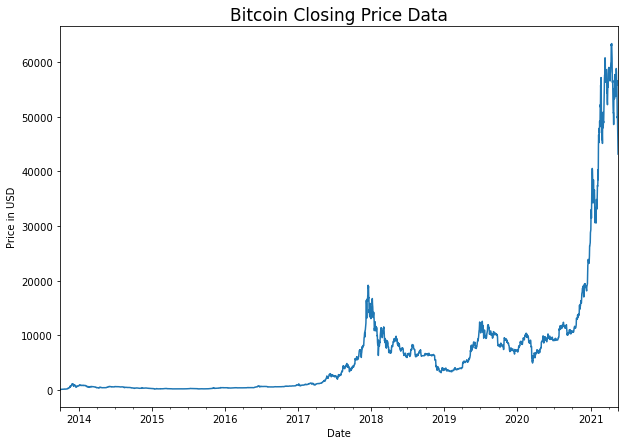

In [360]:
df.iloc[:,1].plot(figsize=(10,7))
plt.title('Bitcoin Closing Price Data',fontsize=17)
plt.ylabel('Price in USD')
plt.show()

> 🔑 **Seasonality**: The seasonality of time series data is how many samples do we have of this data per year. So for our Bitcoin data we have a saisonality of daily or a value of 365.

In [361]:
bitcion_prices = df[['Closing Price (USD)']].rename(columns={'Closing Price (USD)':'Price'})

In [362]:
bitcion_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [363]:
bitcion_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2787 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


## Read in the data using pythons csv module

In [364]:
from datetime import datetime

In [365]:
import csv
with open(path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    next(csvfile) # skip header row
    dates = []
    prices = []
    for row in spamreader:
        dates.append(datetime.strptime(row[1],'%Y-%m-%d'))
        prices.append(float(row[2]))

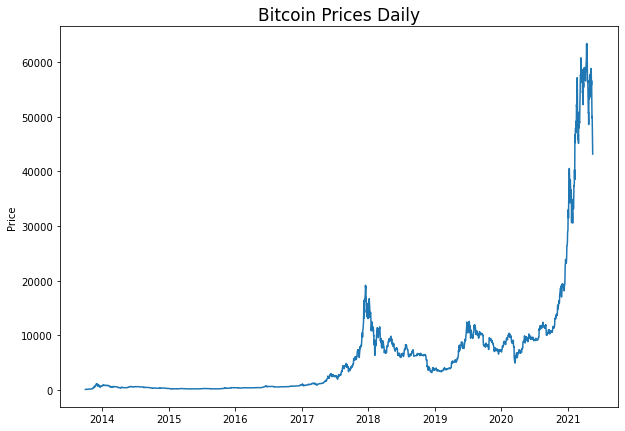

In [366]:
plt.figure(figsize=(10,7))
plt.plot(dates,prices)
plt.ylabel('Price')
plt.title('Bitcoin Prices Daily',fontsize=17)
plt.show()

# Prepare the data

## Create train and test splits

In [367]:
# 80% train and 20% test
split_size = int(len(bitcion_prices)*0.8)

# create train set
X_train,y_train = dates[:split_size], prices[:split_size]

# create test set
X_test, y_test = dates[split_size:], prices[split_size:]

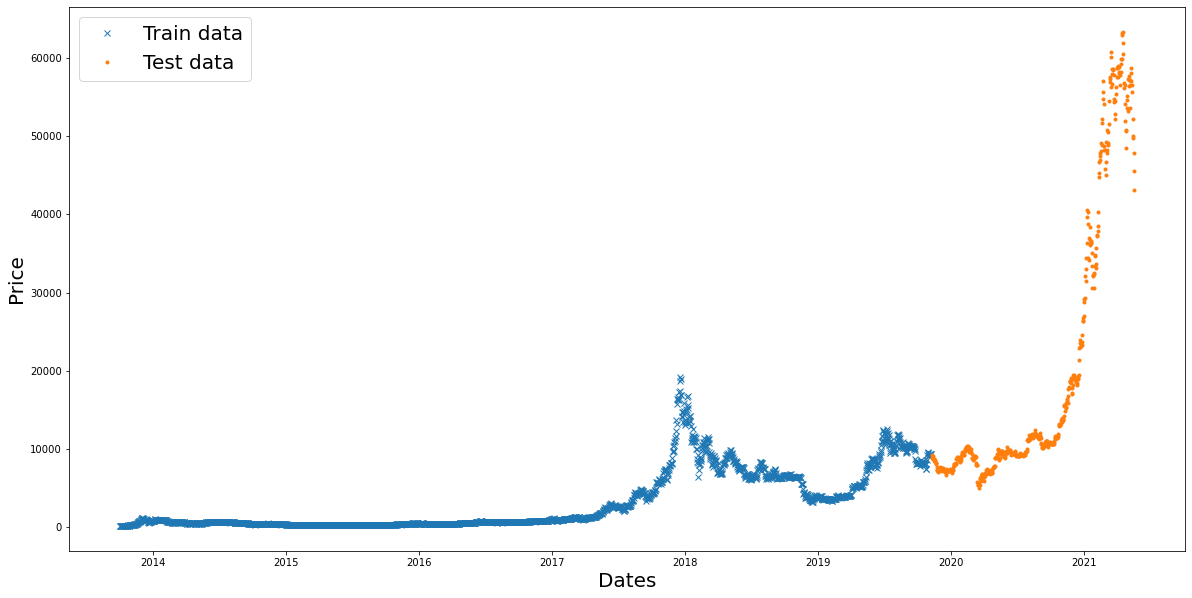

In [368]:
plt.figure(figsize=(20,10))
plt.plot(X_train,y_train,'x')
plt.plot(X_test,y_test,'.')
plt.legend(['Train data','Test data'],fontsize=20)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

### Creating a plotting fuction

In [369]:
import matplotlib.pyplot as plt
# create a function to plot the data
def plot_time_series(timestamp,values,formated='.',start=0,end=None,label=None):
    """
    Plots our timeseries
    """
    plt.plot(timestamp[start:end],values[start:end],formated,label=label)
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

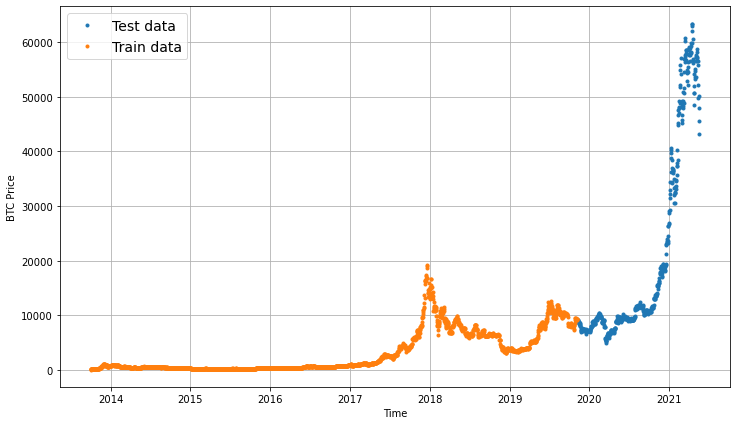

In [370]:
plt.figure(figsize=(12,7))
plot_time_series(X_test,y_test,label='Test data')
plot_time_series(X_train,y_train,label='Train data')

# Model 0 - Naive Time Series Model

Model Formula: $y_{t + 1} = y_t $

In [371]:
# create the Naive baseline forecast
naive_forecast = y_test[:-1]

## Plot the naive forcast against test data

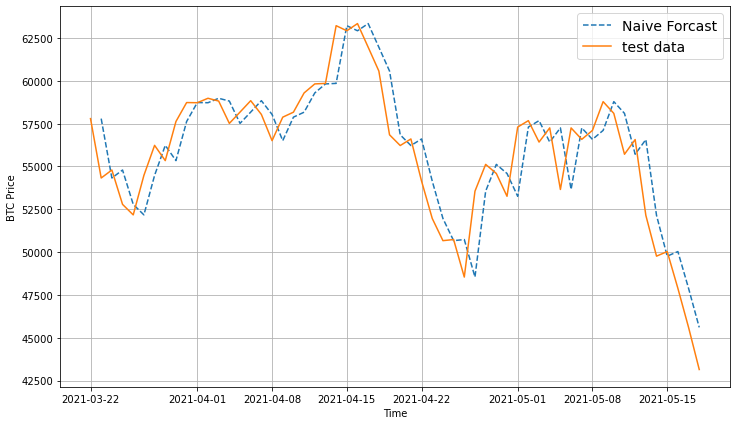

In [372]:
plt.figure(figsize=(12,7))
plot_time_series(X_test[1:],naive_forecast,start=500,end=1000, formated='--',label='Naive Forcast')
plot_time_series(X_test,y_test,start=500, end=1000,formated='-',label='test data')

## Evaluation of our Naive Model



### Implementing the MASE (Mean Absolute Scaled Error)

MASE = $\frac{\frac{1}{J}\sum_j |e_j|}{\frac{1}{T-1}\sum_{t=2}^{T} |Y_t - Y_{t-1}|} $\
where \
$e_j$ ... [__forcast error__](https://en.wikipedia.org/wiki/Forecast_error) (difference between the actual and predicted value) \
$j \in \{1,...,J\}$ with J as the number of forecasts (in our case $J=1$)


In [373]:
def get_mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nom = np.mean(np.abs((y_true-y_pred)))
    denom = np.mean(np.abs((y_true[1:]-y_true[:-1])))
    return nom/denom

In [374]:
mase = get_mase(y_test[1:],naive_forecast)
print('MASE has a value of %.3f'%mase)

MASE has a value of 1.000


In [375]:
# create a function to evaluate our predictions
def evaluate_preds(y_true,y_pred):
    # tensorflow uses datatype float32 by default
    y_true = tf.cast(y_true, dtype = tf.float32)
    y_pred = tf.cast(y_pred, dtype = tf.float32)
    
    # calculate statistics
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase = get_mase(y_true,y_pred)
    
    return({
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': mape.numpy(),
        'mase': mase
    })

In [376]:
len(naive_forecast)

557

In [377]:
len(y_test)

558

In [378]:
naive_results = evaluate_preds(y_test[1:],naive_forecast)
naive_results

{'mae': 567.9803,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Format data part 2: windowing out dataset

We window our dataset to turn our problem into a supervised learning problem

In [379]:
# Set up some global varibales
HORIZON = 1 # how long we are going to predict into the future
WINDOW_SIZE = 7 # how many past days we use to make the prediction

In [380]:
print(f"We want to use this: {prices[:WINDOW_SIZE]} to predict this: {prices[WINDOW_SIZE]}")

We want to use this: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [381]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
    """
        Function to create labels for windowed dataset. 
    """
    return x[:, :-horizon], x[:,-horizon:]

In [382]:
test_window, test_label =  get_labelled_windows(tf.expand_dims(tf.range(8),axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

📚**Ressource**: [Towards Data Science - Fast and Robust Sliding Window Vectorization with NumPy](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5)

In [383]:
import numpy as np

In [384]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    '''
        Function that turns a 1D array to 2D array of sequential labelled windows of window_size and horizon size labels
    '''
    
    # 1. Create a window of window_size
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
    
    # 2. Use numpy indexing to create 2D array of multiple windows 
    windows_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    
    # 3. Indexing on the target array
    windowed_array = x[windows_indexes]#
    
    # get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    
    return(windows, labels)

In [385]:
full_windows, full_labels = make_windows(np.array(prices))

In [386]:
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


## Turning our windows into train and test sets

In [387]:
def make_train_test_splits(windows, labels, test_split=0.2):
    """
        Function that splits matching pairs of windows and labels into train and test splits
    """
    split_size = int(len(windows) * (1 - test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [388]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)

In [389]:
# check if our training labels are equal to before
np.array_equal(np.squeeze(train_labels)[:-HORIZON-1],y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

In [390]:
import os

In [391]:
def create_model_checkpoint(model_name, save_path = "model_experiments", verbose=0, sbo=True):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                              monitor='val_loss',
                                             verbose=verbose,
                                             save_best_only = sbo)

# Model 1 - Dense Model (window size = 7, horizon = 1)

## Using functional API

In [392]:
from tensorflow.keras import layers

# define the input shape
input_shape = (7,)
# define input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

# define middle dense layer
dense = layers.Dense(128, activation='relu', name='dense_layer')(inputs)

# define output layer
outputs = layers.Dense(1, name='output_layer')(dense)

model_1 = tf.keras.Model(inputs, outputs,name='model_1_dense')

## Using Sequential API

In [393]:
# 1. create the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

# 2. compile the model
model_1.compile(
    loss = 'mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae','mse']
)

# 3. fit the model
model_1.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows,test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 490.6638 - mae: 490.6638 - mse: 988182.0000  

2022-02-14 21:41:10.054238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
18/18 [==============================] - 1s 20ms/step - loss: 490.6638 - mae: 490.6638 - mse: 988182.0000 - val_loss: 1427.0743 - val_mae: 1427.0743 - val_mse: 6445733.0000


2022-02-14 21:41:10.291043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 267.5858 - mae: 267.5858 - mse: 336854.0625 - val_loss: 1452.7415 - val_mae: 1452.7415 - val_mse: 6256623.5000
Epoch 3/100
18/18 [==============================] - 0s 15ms/step - loss: 248.9371 - mae: 248.9371 - mse: 305184.0312 - val_loss: 1334.8425 - val_mae: 1334.8425 - val_mse: 5514667.5000
Epoch 4/100
18/18 [==============================] - 0s 17ms/step - loss: 235.6665 - mae: 235.6665 - mse: 278683.2500 - val_loss: 1255.5125 - val_mae: 1255.5125 - val_mse: 5001423.0000
Epoch 5/100
18/18 [==============================] - 0s 16ms/step - loss: 219.6377 - mae: 219.6377 - mse: 249226.8906 - val_loss: 1202.2631 - val_mae: 1202.2631 - val_mse: 4592191.0000
Epoch 6/100
18/18 [==============================] - 0s 16ms/step - loss: 212.9817 - mae: 212.9817 - mse: 232003.9375 - val_loss: 1162.0477 - val_mae: 1162.0477 - val_mse: 4274020.5000
Epoch 7/100
18/18 [==============================] - 0s 16ms/step - loss: 20

In [394]:
# load in the saved best performing model
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")

In [395]:
# evaluate the model
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 585.6095 - mae: 585.6095 - mse: 1204631.1250


2022-02-14 21:41:28.126057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[585.6094970703125, 585.6094970703125, 1204631.125]

In [396]:
model_1_preds = model_1.predict(test_windows)

2022-02-14 21:41:28.257289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [397]:
naive_results

{'mae': 567.9803,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [398]:
# let's write a function to make forcasts for any kind of model
def make_preds(model, X_test, y_test):
    """
        Function that takes in a trained model, makes predictions on X_test and computes evaluation metrics with comparison betwenn y_test and the predictions.
    """
    y_pred = model.predict(X_test)
    
    return evaluate_preds(y_test.reshape(-1,),y_pred.reshape(-1,))

In [399]:
model_1_results = make_preds(model_1, test_windows, test_labels)
model_1_results

{'mae': 585.6095,
 'mse': 1204631.1,
 'rmse': 1097.5569,
 'mape': 2.6245363,
 'mase': 1.0287536}

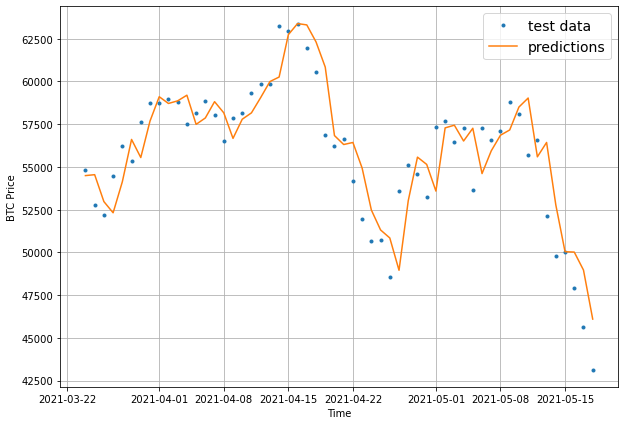

In [400]:
# Lets plot our model 1 predictions

offset = 500
plt.figure(figsize=(10,7))

plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=test_labels[:,0],
    start=offset,
    label="test data"
                
)
plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=model_1_preds[:,0],
    formated='-',
    start=offset,
    label="predictions"          
)

# Model 2 - Dense (window = 30, horizon = 1)

In [401]:
HORIZON = 1
WINDOW_SIZE = 30

In [402]:
full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon = HORIZON)

In [403]:
len(full_windows), len(full_labels)

(2757, 2757)

In [404]:
# create train and test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)

In [405]:
# take a look a the data 
print(f"Window: {train_windows[0]} -> Labels: {train_labels[0]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] -> Labels: [196.02499]


In [406]:
# 1. create model 2
model_2 = tf.keras.Sequential(name='model_2_dense')
model_2.add(layers.Dense(128,activation='relu'))
model_2.add(layers.Dense(1,activation='linear'))

# 2. compile the model
model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae','mse']
)

# 3. fit the model
model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows,test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)]
)

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 821.3403 - mae: 821.3403 - mse: 2876255.2500  

2022-02-14 21:41:28.541862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
18/18 [==============================] - 0s 19ms/step - loss: 738.2068 - mae: 738.2068 - mse: 2423490.7500 - val_loss: 2970.1960 - val_mae: 2970.1960 - val_mse: 22993258.0000


2022-02-14 21:41:28.756002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
18/18 [==============================] - 0s 14ms/step - loss: 424.6321 - mae: 424.6321 - mse: 876853.6875 - val_loss: 1650.9674 - val_mae: 1650.9674 - val_mse: 8952487.0000
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 304.4857 - mae: 304.4857 - mse: 452132.7188 - val_loss: 1734.9803 - val_mae: 1734.9803 - val_mse: 8766415.0000
Epoch 4/100
18/18 [==============================] - 0s 14ms/step - loss: 260.9427 - mae: 260.9427 - mse: 351288.7500 - val_loss: 1441.1761 - val_mae: 1441.1761 - val_mse: 6800349.0000
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 237.5932 - mae: 237.5932 - mse: 296600.7188 - val_loss: 1630.2240 - val_mae: 1630.2240 - val_mse: 7534233.5000
Epoch 6/100
18/18 [==============================] - 0s 24ms/step - loss: 236.3953 - mae: 236.3953 - mse: 280578.5000 - val_loss: 1230.5197 - val_mae: 1230.5197 - val_mse: 5518371.5000
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 222.

In [407]:
# evaluate model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 620.0073 - mae: 620.0073 - mse: 1281839.5000


[620.00732421875, 620.00732421875, 1281839.5]

In [408]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")

In [409]:
# evaluate best performing model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 611.3755 - mae: 611.3755 - mse: 1247659.8750


2022-02-14 21:41:44.243561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[611.3755493164062, 611.3755493164062, 1247659.875]

In [410]:
model_2_preds = model_2.predict(test_windows)

2022-02-14 21:41:44.372777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [411]:
model_2_results = make_preds(model_2,test_windows, test_labels)

In [412]:
model_2_results

{'mae': 611.37555,
 'mse': 1247659.9,
 'rmse': 1116.9869,
 'mape': 2.7825267,
 'mase': 1.0686903}

In [413]:
model_1_results

{'mae': 585.6095,
 'mse': 1204631.1,
 'rmse': 1097.5569,
 'mape': 2.6245363,
 'mase': 1.0287536}

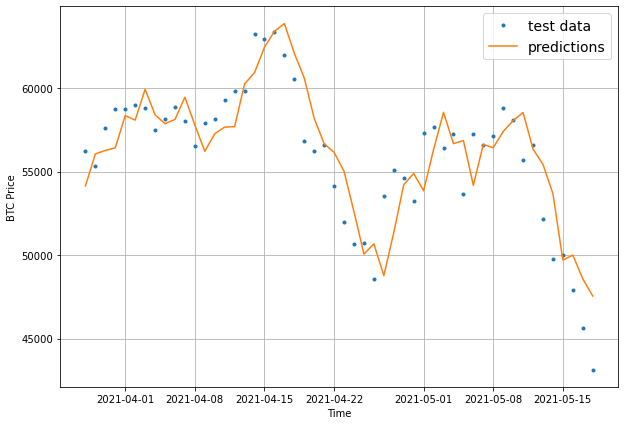

In [414]:
# Lets plot our model 1 predictions

offset = 500
plt.figure(figsize=(10,7))

plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=test_labels[:,0],
    start=offset,
    label="test data"
                
)
plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=model_2_preds[:,0],
    formated='-',
    start=offset,
    label="predictions"          
)

# Model 3 - Dense Model (window = 30, horizon = 7)

In [416]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon=HORIZON)

In [417]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [422]:
# 1. Create the model
model_3 = tf.keras.Sequential(name='model_3_dense')
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(HORIZON))

# 2. Compile the model
model_3.compile(
    loss='MAE',
    optimizer=tf.keras.optimizers.Adam()
)

# 3. Fit the Model
model_3.fit(
    train_windows, 
    train_labels, 
    epochs=128, 
    validation_data = (test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/128


2022-02-14 21:49:21.719442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


64/69 [==========================>...] - ETA: 0s - loss: 706.1462

2022-02-14 21:49:22.347303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
69/69 [==============================] - 1s 9ms/step - loss: 684.3420 - val_loss: 1802.0071
Epoch 2/128
69/69 [==============================] - 0s 5ms/step - loss: 328.1533 - val_loss: 1817.5852
Epoch 3/128
69/69 [==============================] - 0s 7ms/step - loss: 301.0319 - val_loss: 1539.2815
Epoch 4/128
69/69 [==============================] - 0s 7ms/step - loss: 297.6518 - val_loss: 1438.6527
Epoch 5/128
69/69 [==============================] - 0s 5ms/step - loss: 290.6159 - val_loss: 1552.7471
Epoch 6/128
69/69 [==============================] - 0s 5ms/step - loss: 275.5788 - val_loss: 1787.2252
Epoch 7/128
69/69 [==============================] - 0s 5ms/step - loss: 267.6594 - val_loss: 1457.9994
Epoch 8/128
69/69 [==============================] - 0s 5ms/step - loss: 258.6694 - val_loss: 1510.4292
Epoch 9/128
69/69 [==============================] - 0s 7ms/step - loss: 255.2549 - val_loss: 1370.3083
Ep

In [423]:
# Evaluate the model
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1236.1292


1236.129150390625

In [426]:
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense')

In [427]:
model_3_preds = model_3.predict(test_windows)

2022-02-14 21:51:52.363261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [431]:
model_3_preds.shape

(551, 7)

In [432]:
model_2_preds.shape

(552, 1)

In [435]:
model_3_results = make_preds(model_3,test_windows, test_labels)

In [436]:
model_3_results

{'mae': 1212.0969,
 'mse': 5114975.5,
 'rmse': 2261.631,
 'mape': 5.4208136,
 'mase': 1.7659389}